In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

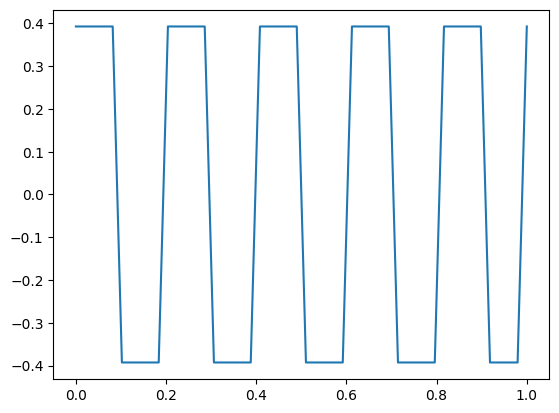

In [2]:
time_series = np.linspace(0, 1, 50)
phi = np.pi/8*signal.square(2 * np.pi * 5 * time_series)
plt.plot(time_series, phi)

In [3]:
def trajectory_gen_1(phi, v, L):
    R = L / np.tan(phi)

    omega = v / R

    theta = omega * time_series # dependencies: omega

    x_ref = R * np.cos(theta) # dependencies: R,  theta
    y_ref = R * np.sin(theta) # dependencies: R,  theta
    theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    # theta_ref
    x_initial = -3
    y_initial = 3

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, x_ref, theta_ref

def trajectory_gen(x_initial=-3, y_initial=3):
    x_ref = np.linspace(0, 10, 100)
    y_ref = 2*np.sin(2 * np.pi * x_ref * 0.2)

    # theta_ref = np.arctan2(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.arctan2(np.diff(y_ref), np.diff(x_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
    theta_ref = np.append(theta_ref, theta_ref[-1])

    x_ref = x_ref + (x_initial - x_ref[0])
    y_ref = y_ref + (y_initial - y_ref[0])

    return x_ref, y_ref, theta_ref

x_ref, y_ref, theta_ref = trajectory_gen()

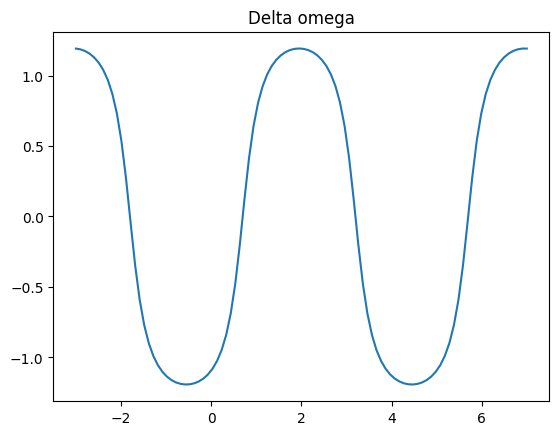

In [4]:
plt.title("Delta omega")
plt.plot(x_ref, theta_ref)

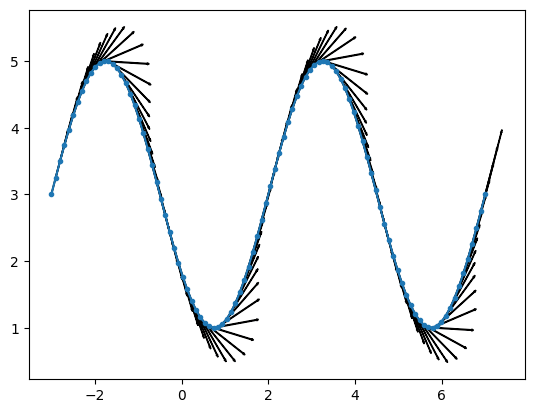

In [5]:
plt.plot(x_ref, y_ref, ".-")

for i, (x, y) in enumerate(zip(x_ref, y_ref)):
    if i >= len(theta_ref):
        break

    plt.arrow(x, y, np.cos(theta_ref[i]), np.sin(theta_ref[i]), width=0.01)

In [6]:
theta_ref

array([ 1.1911887 ,  1.18557288,  1.17395172,  1.15548534,  1.12874634,
        1.09147076,  1.04013347,  0.96925217,  0.87034295,  0.73079535,
        0.53461199,  0.27150567, -0.03982768, -0.34328401, -0.58980428,
       -0.77034579, -0.89830993, -0.98920569, -1.05454387, -1.10194331,
       -1.13631295, -1.16080985, -1.17745727, -1.18751762, -1.19170872,
       -1.19031954, -1.18325495, -1.17002114, -1.14964778, -1.12052718,
       -1.08012867, -1.02451604, -0.94756777, -0.83985727, -0.68768985,
       -0.47509307, -0.19647537,  0.11894204,  0.4112621 ,  0.64077004,
        0.80661064,  0.92398285,  1.00758119,  1.06784611,  1.11160982,
        1.1432679 ,  1.16564737,  1.18055373,  1.18909758,  1.19188182,
        1.18909758,  1.18055373,  1.16564737,  1.1432679 ,  1.11160982,
        1.06784611,  1.00758119,  0.92398285,  0.80661064,  0.64077004,
        0.4112621 ,  0.11894204, -0.19647537, -0.47509307, -0.68768985,
       -0.83985727, -0.94756777, -1.02451604, -1.08012867, -1.12

In [7]:
class Test:
    def __init__(self) -> None:
        self.huy = 0

a = Test()
hasattr(a, "huy")

True

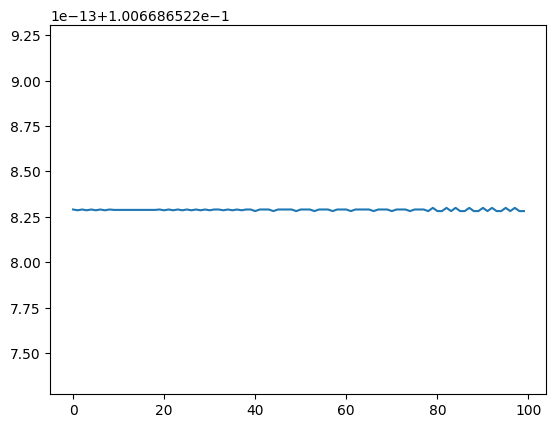

In [8]:
theta_ref = np.arctan(np.diff(x_ref), np.diff(y_ref)) # dependencies: x_ref[-1], x_ref[-2], y_ref[-1], y_ref[-2]
theta_ref = np.append(theta_ref, theta_ref[-1])

# plt.subplot(221)
plt.plot(theta_ref)
# plt.subplot(222)
# plt.plot(time_series, theta)

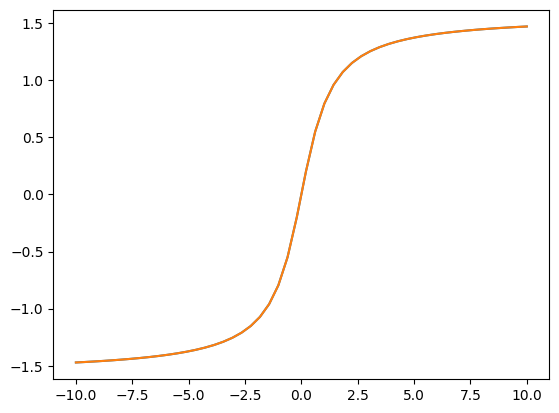

In [9]:

x = np.linspace(-10, 10, 50)
x
plt.plot(x, np.arctan(x))
plt.plot(x, np.arctan2(x, 1))

# Test tf.transformations

In [10]:
! pip install transformations
from transformations import euler_from_quaternion
import numpy as np


x = -3.567130750175205e-05
y = 0.0038529570457739378
z = 0.007426253574866329
w = 0.9999650014912537
theta = euler_from_quaternion([x, y, z, w])[2]

In [11]:
def norm_angle(theta):
    while theta > np.pi:
        theta -= 2* np.pi

    while theta <= -np.pi:
        theta += 2* np.pi

    return theta

In [49]:
x = -0.0016
y = 0.0012

init_theta = 1.57
init_x = -3
init_y = -3

delta_theta = norm_angle(theta - init_theta)
# delta_theta = theta - init_theta
rotation_matrix = np.array([
    [np.cos(delta_theta), -np.sin(delta_theta)],
    [np.sin(delta_theta), np.cos(delta_theta)]
])

state_matrix = np.vstack([
    -3, -3, 0
])

In [50]:
delta_theta

1.5716067680549424

In [51]:
transformation_matrix = np.hstack((np.vstack((rotation_matrix, [0, 0])), state_matrix))
transformation_matrix

array([[-8.10441171e-04, -9.99999672e-01, -3.00000000e+00],
       [ 9.99999672e-01, -8.10441171e-04, -3.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [52]:
transformation_matrix @ np.array((x, y ,0))

array([-0.0011987 , -0.00160097,  0.        ])

In [53]:
print("intit_x:", init_x)
print("intit_y:", init_y)
print("intit_theta:", init_theta)
print(transformation_matrix @ np.array((1, 0, 1)))


intit_x: -3
intit_y: -3
intit_theta: 1.57
[-3.00081044 -2.00000033  0.        ]
